### Stochastic SIR model (discrete state, continuous time) in R using GillespieSSA

In [1]:
library(GillespieSSA)
library(reshape2)

In [2]:
a <- c("beta*S*I","gamma*I")
nu <- matrix(c(-1,+1,0,0,-1,+1),nrow=3,ncol=2,byrow=FALSE)

In [3]:
# GillespieSSA
parms <- c(beta=0.1/1000,gamma=0.05)
x0 <- c(S=999,I=1,R=0)
tf <- 200

In [4]:
set.seed(42)

In [5]:
sir_out <- ssa(x0,a,nu,parms,tf=tf,simName="SIR")

In [6]:
while(sir_out$stats$nSteps==1){
    sir_out <- ssa(x0,a,nu,parms,tf=tf,simName="SIR")
}

In [7]:
head(sir_out$data)

,,S,I,R
timeSeries,0.000000,999,1,0
,1.239429,998,2,0
,3.427902,997,3,0
,7.892282,997,2,1
,9.059502,996,3,1
,9.794212,995,4,1


In [8]:
sir_out_long <- melt(as.data.frame(sir_out$data),"V1")

#### Visualisation

In [9]:
library(ggplot2)

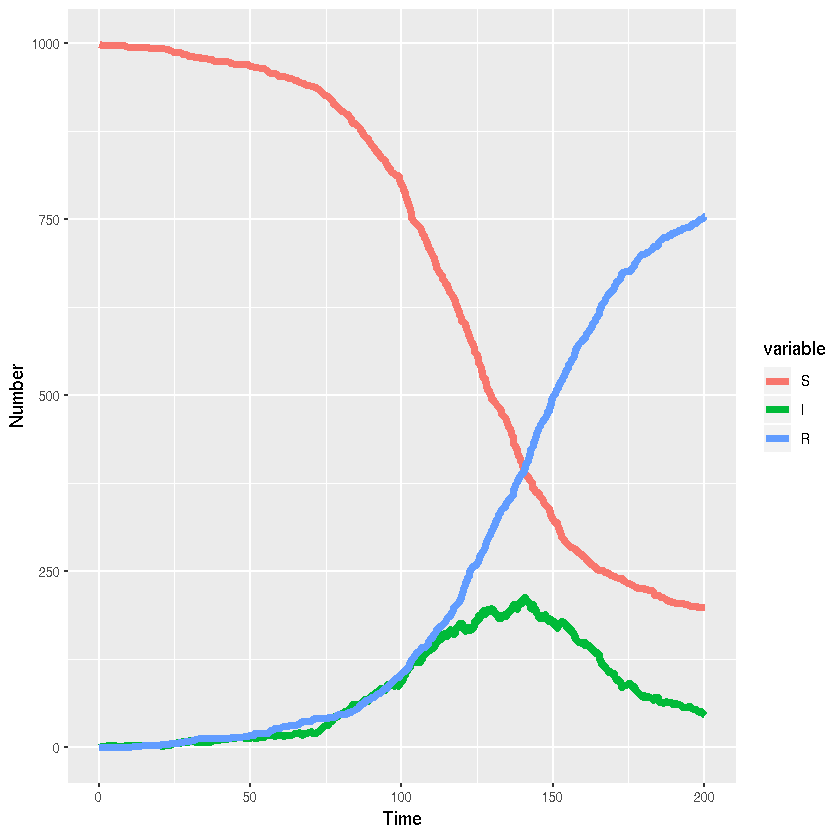

In [10]:
ggplot(sir_out_long,aes(x=V1,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")